In [16]:
#libraries to download

#%pip install matplotlib
#%pip install geojson
#%pip install folium



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
#imports

import requests
from bs4 import BeautifulSoup
import random
import json
import re
import folium
import geojson
from IPython.display import display
import matplotlib.pyplot as plt




In [19]:
#headers to get html_content
HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }


In [70]:
def get_data_from_page(url):
    r = requests.get(url,headers=HEADERS)
    html_content = r.text
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup

def scrape_prices_and_districts(url, max_pages):
    prices_for_each_district = {}
    for page_num in range(1, max_pages+1):
        url_with_page = f"{url}&page={page_num}"
        soup = get_data_from_page(url_with_page)
        if soup:
            prices = soup.find_all('span', class_='css-1uwck7i e1a3ad6s0')
            streets = soup.find_all('p', class_='css-1dvtw4c e12u5vlm0')
            for price, street in zip(prices, streets):
                price_text = price.get_text()
                matches = re.findall(r'\d+', price_text)
                if matches:
                    price_value = int(''.join(matches))
                    district = street.text.strip().split(',')[-3].strip()
                    if district in prices_for_each_district:
                        prices_for_each_district[district].append(price_value)
                    else:
                        prices_for_each_district[district] = [price_value]
                    
        else:
            print("Skipped this page:", page_num)
    return prices_for_each_district
            
  
       
url = "https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/malopolskie/krakow/krakow/krakow?viewType=listing&limit=72&page=2"
pages = 5


def average_prices_for_each_district(url, max_pages):
    result = scrape_prices_and_districts(url, max_pages)
    average_arr = []
    districts = []
    for district in result:
        average = sum(result[district]) / len(result[district])
        districts.append(district)
        average_arr.append(average)
        print(f"{district} {average}")
        for feature in geo_data['features']:
            if feature['properties']['name'] == district:
                feature['properties']['average_price'] = average
    return average_arr, districts





with open('krakow-dzielnice.geojson', 'r', encoding='utf-8') as f:
    geo_data = json.load(f)

average_prices_for_each_district(url, 1)  

m = folium.Map(location=[50.0647, 19.9450], zoom_start=12)
folium.Marker(location=[50.0647, 19.9450], popup="Przykładowy tekst").add_to(m)

folium.GeoJson(geo_data).add_to(m)


#display(m)

Dębniki 1160766.5
Prądnik Biały 803889.5454545454
Zwierzyniec 1961333.3333333333
Stare Miasto 1047096.6666666666
Prądnik Czerwony 702333.3333333334
Podgórze 825307.5
Mistrzejowice 555000.0
Bieżanów-Prokocim 707719.5
Podgórze Duchackie 911531.2
Bronowice 1017000.0
Bieńczyce 660000.0
Wzgórza Krzesławickie 584156.0
Nowa Huta 604500.0
Czyżyny 690000.0
Grzegórzki 586645.0
Swoszowice 677950.0


Prądnik Biały 814253.1818181818
Czyżyny 819750.0
Wzgórza Krzesławickie 389578.0
Stare Miasto 1047096.6666666666
Prądnik Czerwony 702333.3333333334
Podgórze 825307.5
Dębniki 818650.0
Mistrzejowice 555000.0
Bieżanów-Prokocim 707719.5
Podgórze Duchackie 911531.2
Bronowice 1017000.0
Bieńczyce 660000.0
Nowa Huta 604500.0
Grzegórzki 586645.0
Zwierzyniec 2007500.0
Swoszowice 677950.0


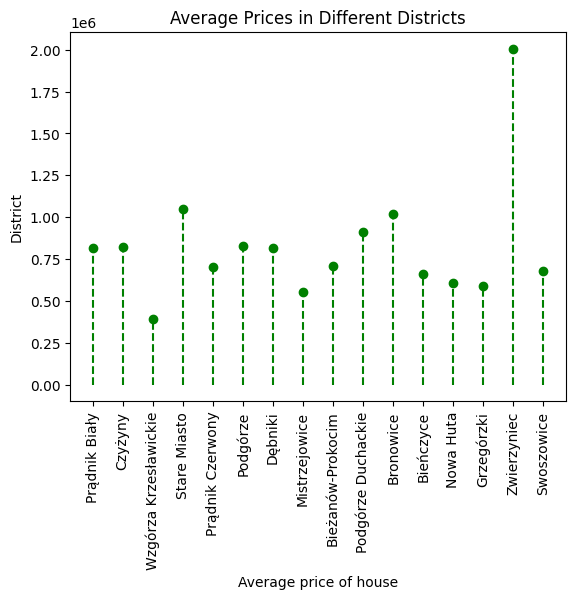

In [68]:
average_prices, districts = average_prices_for_each_district(url, 1)


plt.stem(districts, average_prices, linefmt='g--', markerfmt='go', basefmt=' ')
plt.xlabel('Average price of house')
plt.ylabel('District')
plt.xticks(rotation=90)
plt.title('Average Prices in Different Districts')
plt.show()

In [ ]:
def get_prices_per_meter(url, maxPages): #css-1c1kq07 e12r8p6s0
    districts = []
    prices = []
     for page_num in range(1, max_pages+1):
        url_with_page = f"{url}&page={page_num}"
        soup = get_data_from_page(url_with_page)